<br>
<h1 style = "font-size:30px; font-weight : bold; color : black; text-align: center; border-radius: 10px 15px;">Breast X-Ray (Breast Cancer): Image Classification with Deep Learning</h1>
<br>

Breast cancer image classification using Deep Learning (DL) is a popular research area that aims to improve the accuracy of breast cancer diagnosis. Deep Learning techniques, such as Convolutional Neural Networks (CNNs), have been used to classify breast cancer histopathology images and have shown promising results in achieving the correct classification of breast cancer. There are various deep learning models that have been investigated for this purpose, and ongoing research continues to explore new techniques and improve upon existing ones.
Our approach is trying simple implementations.

<img src="https://healthimaging.com/sites/default/files/styles/gallery/public/2022-09/Series%20on%20annual%20mammograms%20showing%20cancer%20formation_RSNA.jpg.webp?itok=7rAqFvmS" width="620" height="360" align="center"/>

## Importing our libraries 📚📩


In [2]:
%config Completer.use_jedi = False

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow.keras 
import sklearn as sk
import skimage as sm
import cv2 as cv 
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.python.client import device_lib
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers, callbacks

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))


Num GPUs: 1


In [4]:
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

## Loading the images 🖼️

In [5]:
# Define the root directory of the images
root_directory = '/kaggle/input/bioverse-hackathon-a/train'

# Define a dictionary to map directory names to labels
label_mapping = {
    "normal": "normal",
    "malignant": "malignant",
    "beneign": "beneign"
}

# Initialize the data list
data = []

# Traverse through the subdirectories within the root directory and collect image paths and labels
for label in label_mapping.keys():
    label_directory = os.path.join(root_directory, label)
    for dirname, _, filenames in os.walk(label_directory):
        for filename in filenames:
            image_path = os.path.join(dirname, filename)
            data.append((image_path, label))

# Print the generated data list
for image_path, label in data:
    print(image_path, label)


/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_307757120480352/100008A1.png normal
/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_307757120480352/100008A3.png normal
/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_307757120480352/100008A4.png normal
/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_307757120480352/100008A2.png normal
/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_144073772765409/10000866.png normal
/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_144073772765409/10000865.png normal
/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_144073772765409/10000867.png normal
/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_144073772765409/10000868.png normal
/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_306966921462729/1000075B.png normal
/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_306966921462729/1000075E.png normal
/kaggle/input/bioverse-hackathon-a/train/normal/BAHEYA_306966921462729/1000075C.png normal

In [9]:

# Define a dictionary to map labels to numerical values
label_mapping = {"normal": 0, "malignant": 1, "beneign": 2}

# Define lists to store the loaded images and corresponding labels
images = []
labels = []

# Load and preprocess the images with labels
for path, label in data:
    img = load_img(path, target_size=(224, 224))  
    img_array = img_to_array(img) / 255.0  # Convert image to numpy array and normalize values
    images.append(img_array)
    labels.append(label_mapping[label])

# Convert the lists of images and labels to numpy arrays
images_tensor = tf.convert_to_tensor(images)
labels_tensor = tf.convert_to_tensor(labels)

# Convert the numerical labels to categorical format
categorical_labels = to_categorical(labels_tensor, num_classes=len(label_mapping))

# Print shape of the images and labels arrays
print("Shape of images array:", labels_tensor.shape)
print("Shape of labels array:", categorical_labels.shape)

Shape of images array: (376,)
Shape of labels array: (376, 3)


In [10]:
images_array = np.array(images_tensor)
labels_array = np.array(labels_tensor)

In [11]:
# Indices of images for different categories
normal_indices = np.where(labels_array == label_mapping["normal"])[0][:2]
benign_indices = np.where(labels_array == label_mapping["beneign"])[0][:2]
malignant_indices = np.where(labels_array == label_mapping["malignant"])[0][:2]
print(normal_indices)
print(benign_indices)
print(malignant_indices)

[0 1]
[236 237]
[140 141]


## Data Exploration 🌟

### Let us see how the data looks 👀

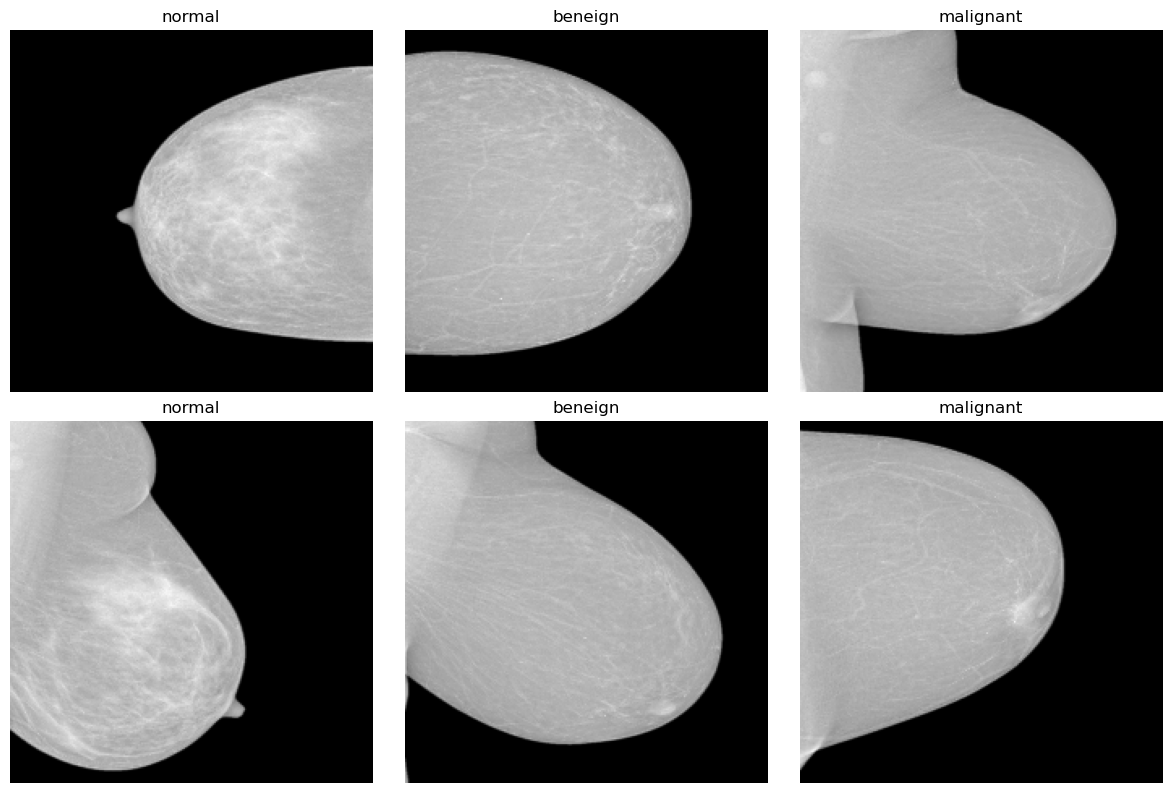

In [12]:
# Plotting the images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, indices in enumerate([normal_indices, benign_indices, malignant_indices]):
    for j, idx in enumerate(indices):
        ax = axes[j, i]
        ax.imshow(images_array[idx])
        ax.set_title(list(label_mapping.keys())[list(label_mapping.values()).index(labels_array[idx])])
        ax.axis('off')
plt.tight_layout()
plt.show()

### what about the distribution of the classes 🤔

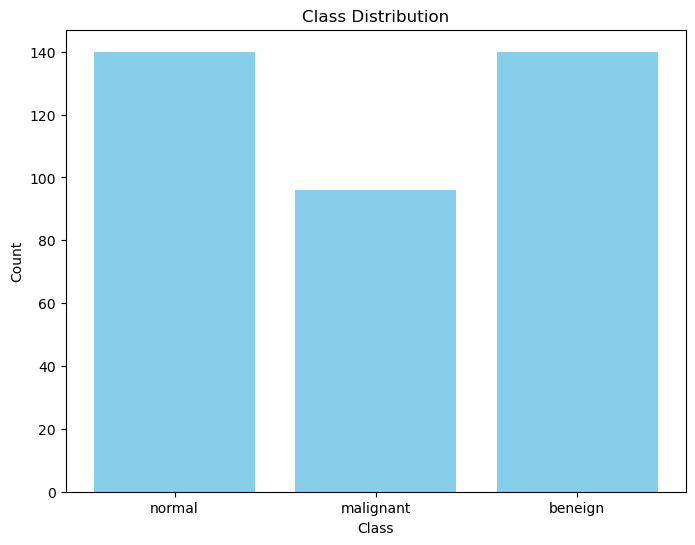

In [13]:
# Plot histograms of class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels_array, bins=np.arange(len(label_mapping) + 1) - 0.5, align='mid', rwidth=0.8, color='skyblue')
plt.xticks(list(label_mapping.values()), list(label_mapping.keys()))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

### Is there any possible relations in the image intensities 🙈
Seems that normal breasts have more uniform intensities that are not concentrated on one part of the graph!

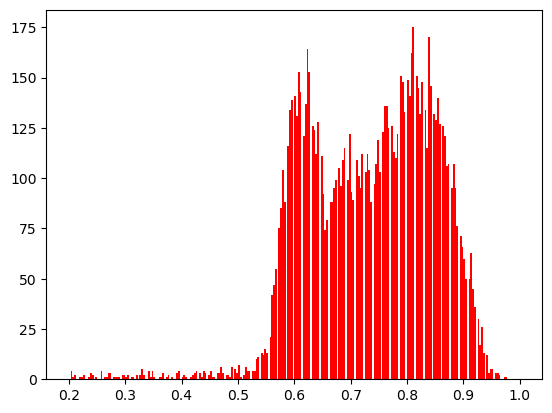

In [14]:
# Normal distribution
plt.hist(images_array[6,:,:, 0].ravel(), bins=256, range=(0.2, 1), color='red');

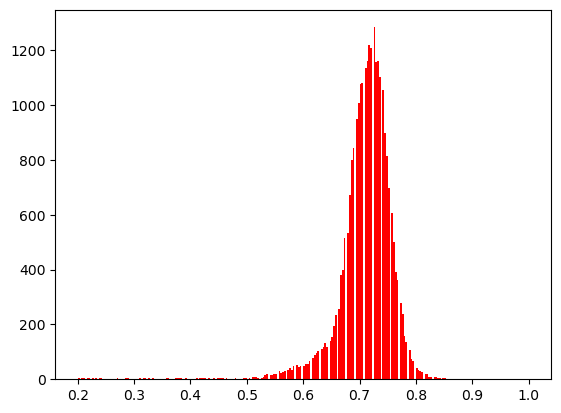

In [15]:
# beginin
plt.hist(images_array[236,:,:, 0].ravel(), bins=256, range=(0.2, 1), color='red');

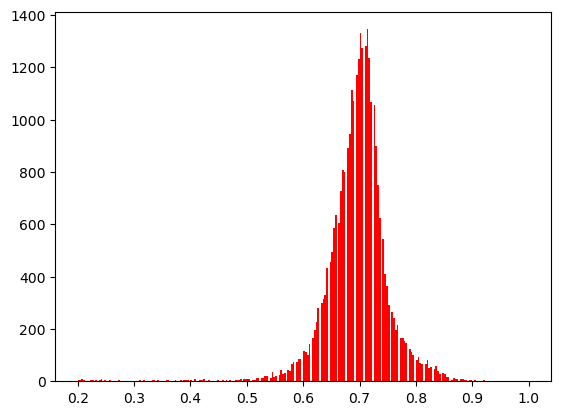

In [16]:
# malignant
plt.hist(images_array[140,:,:, 0].ravel(), bins=256, range=(0.2, 1), color='red');

## Data preparation and preprocessing 🔨

In [32]:
num_images = images_array.shape[0]
num_pixels = images_array.shape[1] * images_array.shape[2] * images_array.shape[3]
flattened_images = images_array.reshape(num_images, num_pixels)

In [41]:


X_train, X_test, y_train, y_test= train_test_split(flattened_images,labels_array, test_size=0.2, random_state=42,shuffle=True,stratify=labels_array)


In [42]:

n_classes = 3
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (300,)
Shape after one-hot encoding:  (300, 3)


In [52]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [53]:


device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4542971891507057913
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15680143360
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13381051002050926186
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [54]:
tf.test.is_gpu_available()

True

## Model Creation 🎭

Best Validation Loss: 0.9257
Best Validation Accuracy: 0.6053


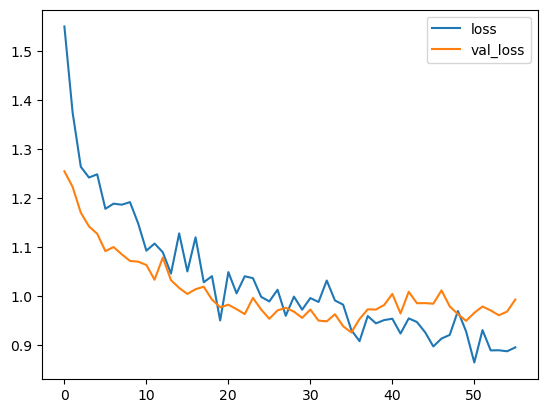

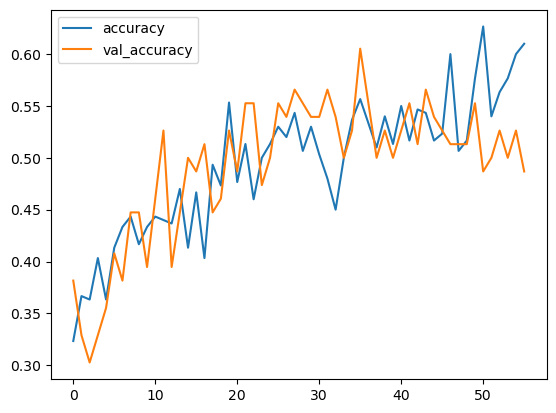

In [134]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

model = keras.Sequential([
    layers.BatchNormalization(input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.35),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(3, activation='softmax'),
])


model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')
# training the model and saving metrics in history
history = model.fit(X_train, y_train,
          batch_size=16, epochs=100,
          verbose=0,
          validation_data=(X_test, y_test),
                   callbacks=[early_stopping])




## Results 😶‍🌫️

In [ ]:
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

## Submission 📝

In [130]:
# saving the model
save_dir = "/kaggle/working/"
model_name = 'bioverse.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /kaggle/working/bioverse.h5 


In [136]:
cancer_model = load_model('/kaggle/working/bioverse.h5')

loss_and_metrics = cancer_model.evaluate(X_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

3/3 - 0s - loss: 0.8961 - accuracy: 0.6316 - 260ms/epoch - 87ms/step
Test Loss 0.8961004018783569
Test Accuracy 0.6315789222717285


In [141]:
np.argmax(y_pred,axis=1)

array([2, 1, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0,
       1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 0, 1, 2, 2, 2, 2])

In [140]:
np.argmax(y_test,axis=1)

array([0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0,
       1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0,
       0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1,
       1, 0, 2, 0, 2, 1, 0, 2, 2, 2])

In [143]:
y_pred = cancer_model.predict(X_test)

micro_f1 = f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='macro')

print("Micro F1 Score:", micro_f1)

3/3 [==============================] - 0s 7ms/step
Micro F1 Score: 0.6310352097828379


In [148]:
# Define the root directory of the images
root_directory = '/kaggle/input/bioverse-hackathon-a/test'

# Initialize the data list
data = []
    
for dirname, _, filenames in os.walk('/kaggle/input/bioverse-hackathon-a/test'):
    for filename in filenames:
            image_path = os.path.join(dirname, filename)
            data.append((image_path, label))

# Print the generated data list
for image_path, label in data:
    print(image_path, label)


/kaggle/input/bioverse-hackathon-a/test/BAHEYA_311474891537523_10000518.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_334794925918542_1000007A.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_243443851199595_10000648.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_143146704649874_1000078B.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_277012924071188_100007D8.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_314462773124266_10000837.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_527889921141576_10000281.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_252924918682013_10000279.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_216583765798667_10000267.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_530797629198321_100002DA.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_277012924071188_100007D7.png beneign
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_593738677445146_10000104.png 

In [161]:
test = []

# Load and preprocess the images with labels
for path, label in data:
    img = load_img(path, target_size=(224, 224))  
    img_array = img_to_array(img) / 255.0  # Convert image to numpy array and normalize values
    test.append(img_array)

test=np.array(test)

In [164]:
num_images = test.shape[0]
num_pixels = test.shape[1] * test.shape[2] * test.shape[3]
flattened_test = test.reshape(num_images, num_pixels)
flattened_test.shape

(168, 150528)

In [166]:
print(filenames)

['BAHEYA_311474891537523_10000518.png', 'BAHEYA_334794925918542_1000007A.png', 'BAHEYA_243443851199595_10000648.png', 'BAHEYA_143146704649874_1000078B.png', 'BAHEYA_277012924071188_100007D8.png', 'BAHEYA_314462773124266_10000837.png', 'BAHEYA_527889921141576_10000281.png', 'BAHEYA_252924918682013_10000279.png', 'BAHEYA_216583765798667_10000267.png', 'BAHEYA_530797629198321_100002DA.png', 'BAHEYA_277012924071188_100007D7.png', 'BAHEYA_593738677445146_10000104.png', 'BAHEYA_744303520973012_100002BC.png', 'BAHEYA_212373239691714_10000458.png', 'BAHEYA_314462773124266_10000836.png', 'BAHEYA_251085191907684_100012E5.png', 'BAHEYA_114876720430193_10000027.png', 'BAHEYA_283598239760432_1000004A.png', 'BAHEYA_267807239218337_100003DB.png', 'BAHEYA_310899704353513_100003C6.png', 'BAHEYA_314229665537696_10000CA2.png', 'BAHEYA_408189912103241_10000252.png', 'BAHEYA_248501833192597_10001291.png', 'BAHEYA_698979600308097_100001A0.png', 'BAHEYA_243443851199595_1000064A.png', 'BAHEYA_277012924071188_

In [171]:
y_pred = cancer_model.predict(flattened_test)
preds=np.argmax(y_pred,axis=1)

6/6 [==============================] - 0s 9ms/step


label_mapping = {"normal": 0, "malignant": 1, "beneign": 2}


In [177]:
submn = pd.DataFrame({'filename' : filenames,'class': preds},)
submn

,filename,class
0,BAHEYA_311474891537523_10000518.png,2
1,BAHEYA_334794925918542_1000007A.png,0
2,BAHEYA_243443851199595_10000648.png,2
3,BAHEYA_143146704649874_1000078B.png,1
4,BAHEYA_277012924071188_100007D8.png,0
...,...,...
163,BAHEYA_482384912886716_100013E9.png,0
164,BAHEYA_251085191907684_100012E6.png,1
165,BAHEYA_698979600308097_100001A1.png,2
166,BAHEYA_283598239760432_10000047.png,2


In [180]:
label_mapping = {0: "normal", 1: "malignant", 2: "beneign"}

# Replace the numerical labels with string labels
submn['class'] = submn['class'].replace(label_mapping)

submn

,filename,class
0,BAHEYA_311474891537523_10000518.png,beneign
1,BAHEYA_334794925918542_1000007A.png,normal
2,BAHEYA_243443851199595_10000648.png,beneign
3,BAHEYA_143146704649874_1000078B.png,malignant
4,BAHEYA_277012924071188_100007D8.png,normal
...,...,...
163,BAHEYA_482384912886716_100013E9.png,normal
164,BAHEYA_251085191907684_100012E6.png,malignant
165,BAHEYA_698979600308097_100001A1.png,beneign
166,BAHEYA_283598239760432_10000047.png,beneign


In [182]:
submn.to_csv('submission.csv', index=False)